In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [10]:
df = pd.read_csv('../../datasets/loan_data_clean.csv')
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1


In [11]:
df.describe()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.744300,0.218241,0.237785,247.117264,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.009623,0.413389,0.534737,143.537853,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,3.000000,1.000000,2.000000,504.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [12]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.drop(columns='Unnamed: 0', inplace=True)


In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1


In [16]:
df.to_csv('../../datasets/clean_data_loan_edited.csv')

In [18]:
scaler = StandardScaler()

In [19]:
df_scaled = scaler.fit_transform(df)

In [21]:
pd.DataFrame(df_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,614.0,-1.215098e-16,1.000815,-1.990376,0.382616,0.382616,0.382616,2.755608
1,614.0,9.257886e-17,1.000815,-1.357847,-1.357847,0.705812,0.705812,2.769470
2,614.0,2.893089e-18,1.000815,-0.737806,-0.737806,-0.737806,0.253470,2.236021
3,614.0,1.735854e-17,1.000815,-0.528362,-0.528362,-0.528362,-0.528362,1.892641
4,614.0,1.446545e-17,1.000815,-0.445039,-0.445039,-0.445039,-0.445039,3.298167
5,614.0,3.182398e-17,1.000815,-1.723021,-0.884580,-0.018249,0.855055,1.791111
6,614.0,4.050325e-17,1.000815,-0.554487,-0.554487,-0.148005,0.231202,13.696173
7,614.0,5.786179e-18,1.000815,-1.636463,-0.549752,-0.207364,0.218388,6.592764
8,614.0,5.930833e-17,1.000815,-5.132498,0.273231,0.273231,0.273231,2.137276
9,614.0,-1.620130e-16,1.000815,-2.428760,0.411733,0.411733,0.411733,0.411733


In [22]:
kmean = KMeans(n_clusters=2, init='k-means++')

In [23]:
kmean.fit(df_scaled)

KMeans(n_clusters=2)

In [24]:
kmean.inertia_

6552.774233791888

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecat

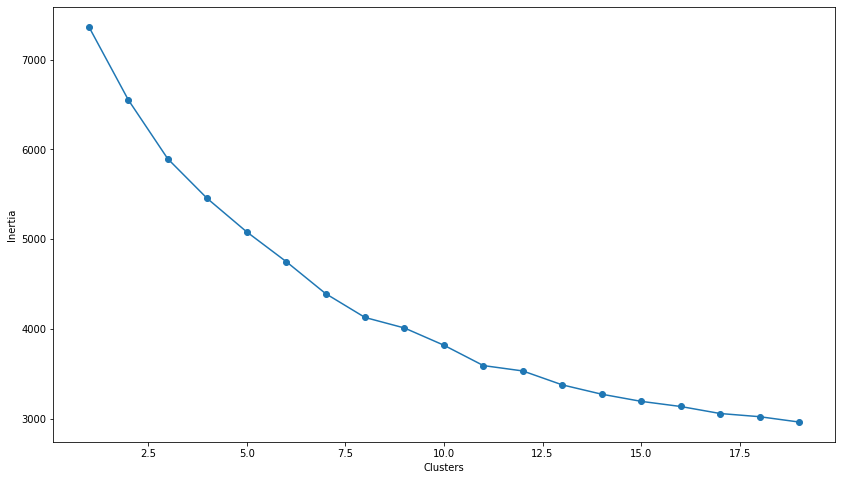

In [26]:
MKMM = []

for cluster in range(1, 20):
    kmeans = KMeans(n_jobs=-1, n_clusters=cluster, init='k-means++')
    kmeans.fit(df_scaled)
    
    MKMM.append(kmeans.inertia_)
    
df_frame = pd.DataFrame({'Cluster': range(1,20), 'MKMM': MKMM})

plt.figure(figsize=(14, 8))
plt.plot(df_frame['Cluster'], df_frame['MKMM'], marker='o')

plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.show()

In [48]:
kmeans_new = KMeans(n_clusters=7, init='k-means++')

In [49]:
kmeans_new.fit(df_scaled)

KMeans(n_clusters=7)

In [50]:
prediction = kmeans_new.predict(df_scaled)

In [51]:
kmeans_new.inertia_

4406.058257984489

In [52]:
frame_new  = pd.DataFrame(df_scaled)
frame_new['cluster'] = prediction
frame_new['cluster'].value_counts()

2    185
1    138
4     88
3     83
0     70
6     46
5      4
Name: cluster, dtype: int64

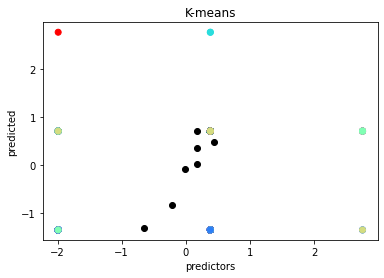

In [53]:
plt.scatter(df_scaled[:, 0], df_scaled[:,1], c=kmeans_new.labels_, cmap='rainbow')
plt.scatter(kmeans_new.cluster_centers_[:,0], kmeans_new.cluster_centers_[:,1], color='black')

plt.title('K-means')
plt.xlabel('predictors')
plt.ylabel('predicted')

plt.show()